Nama: Wahyu Krisna Aji

Dataset: Apple Stock Price from 1980-2021

Source of Dataset: Kaggle

Link Dataset: https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021

In [63]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [64]:
data = pd.read_csv('AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.13,0.13,0.13,0.13,0.10,469033600
1,1980-12-15,0.12,0.12,0.12,0.12,0.09,175884800
2,1980-12-16,0.11,0.11,0.11,0.11,0.09,105728000
3,1980-12-17,0.12,0.12,0.12,0.12,0.09,86441600
4,1980-12-18,0.12,0.12,0.12,0.12,0.09,73449600
...,...,...,...,...,...,...,...
10463,2022-06-13,132.87,135.20,131.44,131.88,131.88,122207100
10464,2022-06-14,133.13,133.89,131.48,132.76,132.76,84784300
10465,2022-06-15,134.29,137.34,132.16,135.43,135.43,91533000
10466,2022-06-16,132.08,132.39,129.04,130.06,130.06,108123900


In [65]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [66]:
data = data[['Date', 'Close']]

In [67]:
data.head()

,Date,Close
0,1980-12-12,0.13
1,1980-12-15,0.12
2,1980-12-16,0.11
3,1980-12-17,0.12
4,1980-12-18,0.12


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10468 non-null  object 
 1   Close   10468 non-null  float64
dtypes: float64(1), object(1)
memory usage: 163.7+ KB


In [69]:
mae_rate = (data['Close'].max() - data['Close'].min()) * 10/100
print(mae_rate)

18.196088800000002


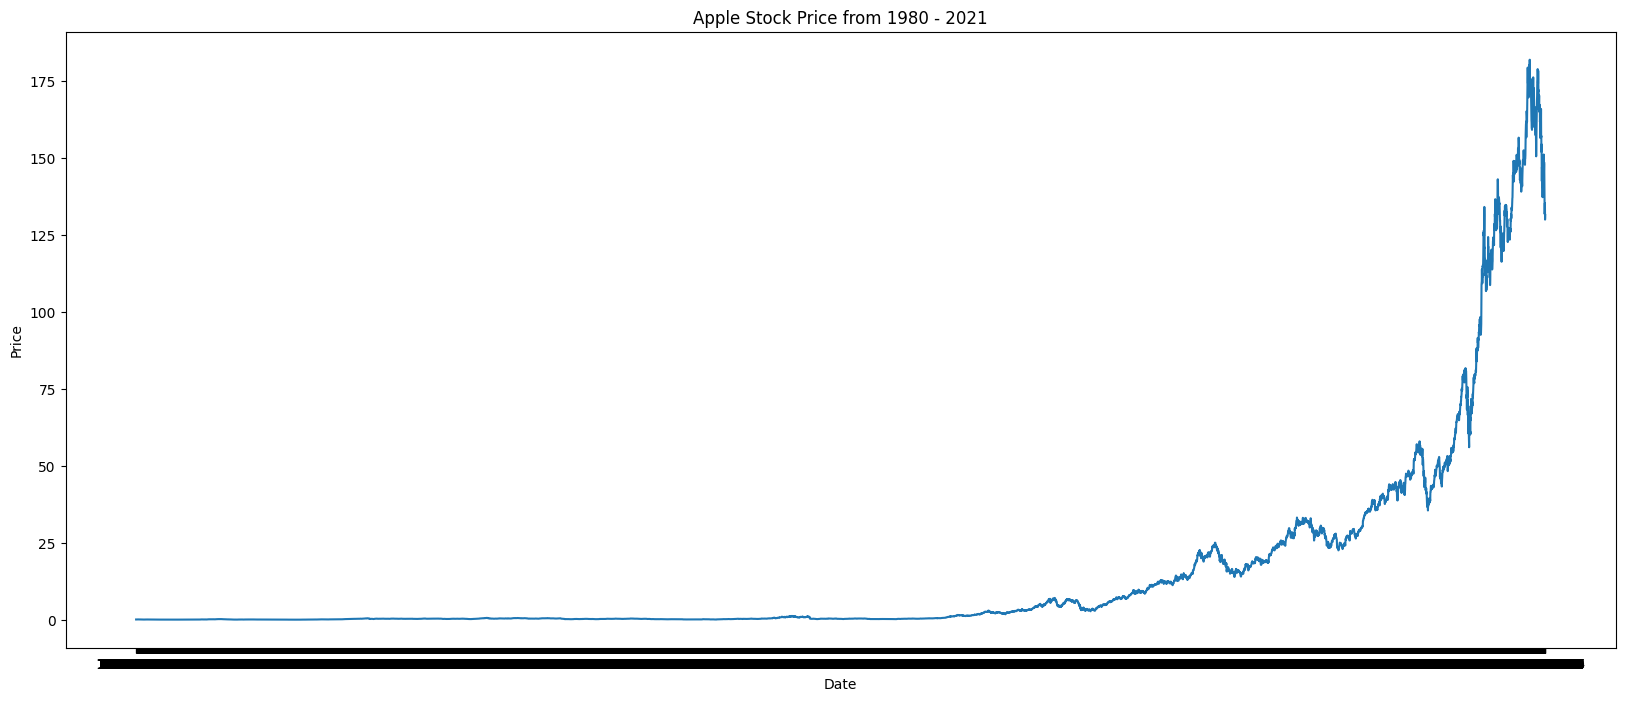

In [71]:
Date = data['Date'].values
Price = data['Close'].values

plt.figure(figsize=(20,8))
plt.plot(Date, Price)
plt.title('Apple Stock Price from 1980 - 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [72]:
x_train, x_test, y_train, y_test = train_test_split(Price, Date, test_size = 0.2)

In [73]:
print('Jumlah Data Latih : ',len(x_train))
print('Jumah Data Validasi : ',len(x_test))

Jumlah Data Latih :  8374
Jumah Data Validasi :  2094


In [74]:
#  Function untuk mengubah data menjadi dapat dibaca oleh model
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  data_series = tf.data.Dataset.from_tensor_slices(series)
  data_series = data_series.window(window_size + 1, shift=1, drop_remainder = True)
  data_series = data_series.flat_map(lambda w: w.batch(window_size + 1))
  data_series = data_series.shuffle(shuffle_buffer)
  data_series = data_series.map(lambda w: (w[:-1], w[-1:]))
  return data_series.batch(batch_size).prefetch(1)

In [75]:
data_training = windowed_dataset(x_train, window_size=64, batch_size=128, shuffle_buffer=1000)
data_testing = windowed_dataset(x_test, window_size=64, batch_size=128, shuffle_buffer=1000)

In [76]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1),
])

In [82]:
optimizers = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizers,
              metrics=["mae"])
model_history = model.fit(
    data_training,
    epochs=50, 
    validation_data=data_testing, 
)

Epoch 1/50
65/65 [==============================] - 23s 297ms/step - loss: 14.3310 - mae: 14.6984 - val_loss: 13.5456 - val_mae: 13.9015
Epoch 2/50
65/65 [==============================] - 20s 297ms/step - loss: 14.3305 - mae: 14.7042 - val_loss: 13.5425 - val_mae: 13.9032
Epoch 3/50
65/65 [==============================] - 21s 328ms/step - loss: 14.3199 - mae: 14.6942 - val_loss: 13.5366 - val_mae: 13.9066
Epoch 4/50
65/65 [==============================] - 20s 305ms/step - loss: 14.3211 - mae: 14.6991 - val_loss: 13.5333 - val_mae: 13.9087
Epoch 5/50
65/65 [==============================] - 19s 285ms/step - loss: 14.3095 - mae: 14.6901 - val_loss: 13.5296 - val_mae: 13.9114
Epoch 6/50
65/65 [==============================] - 19s 287ms/step - loss: 14.3094 - mae: 14.6915 - val_loss: 13.5267 - val_mae: 13.9136
Epoch 7/50
65/65 [==============================] - 19s 293ms/step - loss: 14.3021 - mae: 14.6871 - val_loss: 13.5239 - val_mae: 13.9159
Epoch 8/50
65/65 [=======================